In [1]:
from methyl_aware_distance import MethylAwareDistance

In [2]:
mad = MethylAwareDistance('Boobies','T')
mad.space_efficient_levenshtein_methyl_aware()

7

In [3]:
mad = MethylAwareDistance('ACTG','ATTG')
mad.hamming_methyl_aware(), mad.levenshtein_distance(), mad.space_efficient_levenshtein_distance()

(0, 0, 0)

In [15]:
edit_distance.equal_length

True

In [4]:
edit_distance = MethylAwareDistance('ACTG','ATTGA')
edit_distance.levenshtein_distance(), edit_distance.space_efficient_levenshtein_distance()

(1, 1)

In [5]:
edit_distance.hamming_methyl_aware()

ValueError: Error: lengths of sequences should be the same.

In [6]:
expected = 'ATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGT'
observed_CtoT = 'ATGTGTACGTTAGCTAGGTTACGTAGCTAGCGTACGATCGTAGCTAGTGT'
observed_GtoA = 'ATGCATACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAACAT'

In [7]:
edit_distance = MethylAwareDistance(expected,observed_CtoT)
edit_distance.hamming_methyl_aware()

0

In [8]:
edit_distance = MethylAwareDistance(expected,observed_GtoA)
edit_distance.hamming_methyl_aware()

3

In [9]:
edit_distance = MethylAwareDistance(expected,observed_GtoA,read_1=False)
edit_distance.hamming_methyl_aware()

0

-----

In [10]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
expected = 'ATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTA CTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGT GCTAGTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACG ACGTAGCTAGC'
len(expected)


observed_CtoT = 'ATGCGTACGTTAGTTAGGCTACGTAGTTAGCGTACGATCGTAGTTAGCGTGATTGCGTAGTTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTA CTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGT GCTAGTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTATGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACG ACGTAGCTAGC'


observed_GtoA = 'ATACATACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTA CTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGT GCTAATAACATACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACG ACGTAACTAAC'


len(expected)

1000

In [12]:
reps = 1
steps = 100


time_dp  = {}
for nbases in range(10,len(expected),steps):
    time_dp[nbases] = []
    for rep in range(reps):
        start = time.time()
        edit_distance = MethylAwareDistance(expected[:nbases], 
                                            observed_CtoT[:nbases])
        edit_distance.levenshtein_distance()
        end = time.time()
        time_dp[nbases].append(end - start)

sequence_length_dp = {k : np.mean(v) for k,v in time_dp.items()}

sequence_length_dp = pd.DataFrame.from_dict(sequence_length_dp,orient='index',columns=['average time'])


time_sp  = {}
for nbases in range(10,len(expected),steps):
    time_sp[nbases] = []
    for rep in range(10):
        start = time.time()

        edit_distance = MethylAwareDistance(expected[:nbases], 
                                            observed_CtoT[:nbases])
        edit_distance.space_efficient_levenshtein_distance()
        
        end = time.time()
        time_sp[nbases].append(end - start)


sequence_length_sp = {k : np.mean(v) for k,v in time_sp.items()}
sequence_length_sp = pd.DataFrame.from_dict(sequence_length_sp,orient='index',columns=['average time'])

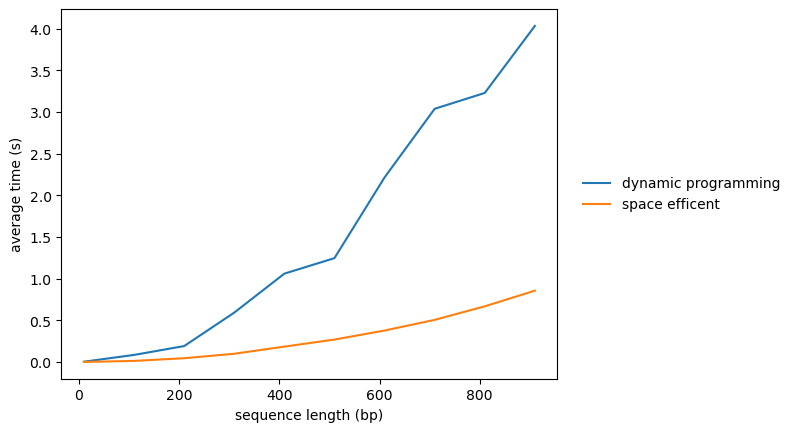

In [13]:
sns.lineplot(data=sequence_length_dp.reset_index(),x='index',y='average time',label='dynamic programming')
sns.lineplot(data=sequence_length_sp.reset_index(),x='index',y='average time',label='space efficent')

plt.legend(bbox_to_anchor=(1.25,0.5),loc='center',frameon=False)
plt.xlabel('sequence length (bp)')
plt.ylabel('average time (s)')
plt.show()